#### Open File and use splitlines to ensure we can call different words in our dataset

In [1]:
words = open('names.txt','r').read().splitlines()

In [2]:
# First 10 Words
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

#### Learning some things about our dataset. Always an important step

In [3]:
print('Number of words: ',len(words))
print('Minimum word length: ',min(len(word) for word in words))
print('Maximum word length: ',max(len(word) for word in words))

Number of words:  32033
Minimum word length:  2
Maximum word length:  15


In [4]:
# My implementation of splitting words into bigrams

for word in words[:1]: # Print first 10 words
    last_char = None
    for char in list(word): # Print each character in the word, casting to a list makes it an iterable
        if last_char != None:
            print(last_char, char)
        last_char = char
    print()

# Much simpler Karpathy implementation

for word in words[:1]: 
    for ch1, ch2 in zip(word, word[1:]):
        print(ch1, ch2)

e m
m m
m a

e m
m m
m a


In [5]:
b = {} # Dictionary tally of bigrams
for word in words: 
    chars = ['<S>'] + list(word) + ['<E>'] # Add SOS and EOS tokens to the word
    for ch1, ch2 in zip(chars, chars[1:]): # Same Karpathy implementation as before
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # Creates a tally of bigrams, if it doesn't exist, create it and set it to 0, then add 1 for the first word, and if it does add 1 to the current running count.

In [6]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [7]:
sorted(b.items(), key=lambda x: x[1], reverse=True)[:10] # Sorts the dictionary by the value, and returns the top 10 most common bigrams

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [8]:
chars = sorted(list(set(''.join(words)))) # Sorted list of unique characters
chars = chars + ['<S>'] + ['<E>'] # Add SOS and EOS tokens to the list of characters

stoi = {ch: i for i, ch in enumerate(chars)} # Dictionary of characters to ibndex
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [9]:
import torch

N = torch.zeros(28, 28, dtype=torch.int32)

for word in words: 
    chars = ['<S>'] + list(word) + ['<E>'] # Add SOS and EOS tokens to the word
    for ch1, ch2 in zip(chars, chars[1:]): # Same Karpathy implementation as before
        ix1 = stoi[ch1] 
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

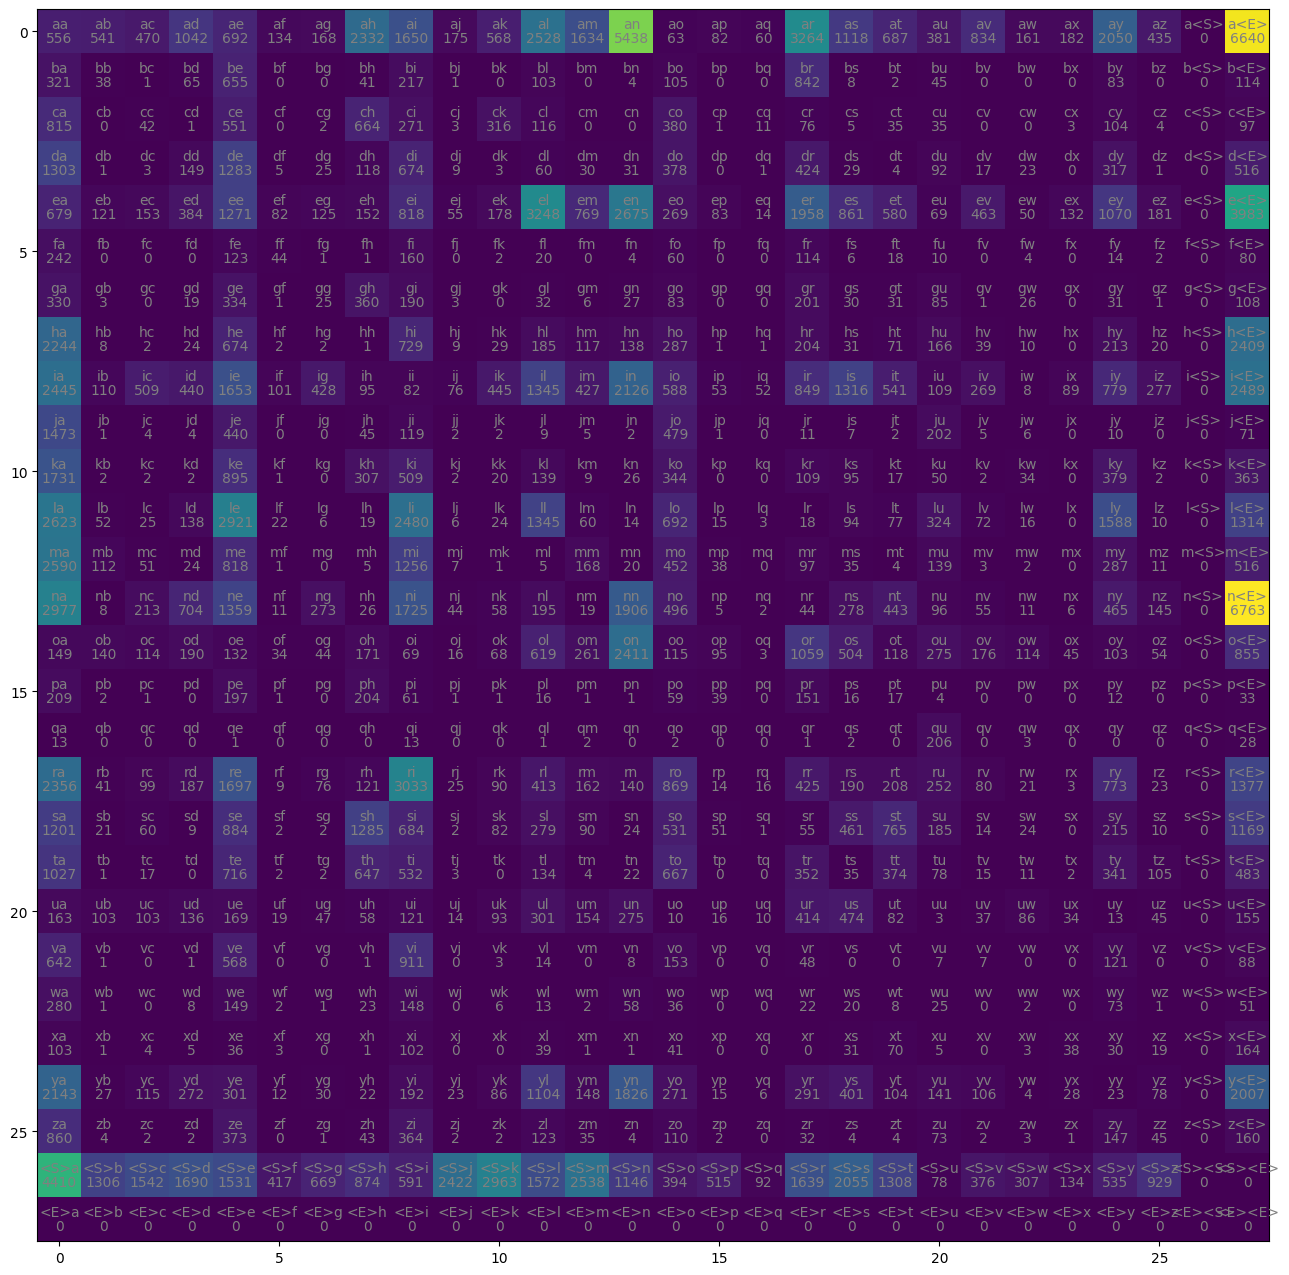

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
print(list(colormaps))
%matplotlib inline

itos = {i: ch for ch, i in stoi.items()} # Dictionary of index to characters

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='viridis') # Cmap isnt working for some reason.

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

plt.imshow(N)